In [60]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae

In [61]:
df_train=pd.read_csv('C:/Users/Jay/Desktop/Python/Projects/P3/counterfeit_train.csv')
df_test=pd.read_csv('C:/Users/Jay/Desktop/Python/Projects/P3/counterfeit_test.csv')

In [62]:
df_train.head()

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales
0,RRA15,13.100,Area046,1995,160.2366,Antimalarial,critical,0.070422,DownTown,Tier 1,Small,1775.5026
1,YVV26,NaN,Area027,1983,110.4384,Mstablizers,mild,0.013000,CityLimits,Tier 3,Medium,3069.1520
2,LJC15,9.025,Area046,1995,259.4092,Cardiac,mild,0.060783,DownTown,Tier 1,Small,2603.0920
3,GWC40,11.800,Area046,1995,99.9830,OralContraceptives,mild,0.065555,DownTown,Tier 1,Small,1101.7130
4,QMN13,NaN,Area019,1983,56.4402,Hreplacements,critical,0.248859,MidTownResidential,Tier 1,Small,158.9402


In [63]:
df_train['Medicine_MRP']

0       160.2366
1       110.4384
2       259.4092
3        99.9830
4        56.4402
          ...   
6813    204.1452
6814    235.1088
6815    193.6292
6816    162.8682
6817    177.5500
Name: Medicine_MRP, Length: 6818, dtype: float64

In [64]:
df_test.head()

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level
0,HLZ81,NaN,Area027,1983,85.5328,Antibiotics,mild,0.112747,CityLimits,Tier 3,Medium
1,ECE94,13.45,Area045,2000,257.1460,OralContraceptives,mild,0.144446,DownTown,Tier 2,Unknown
2,SAD14,7.10,Area045,2000,98.1172,Antipyretics,mild,0.144221,DownTown,Tier 2,Unknown
3,EQV63,18.30,Area010,1996,135.3730,Tranquilizers,mild,0.100388,MidTownResidential,Tier 3,Unknown
4,AIR10,NaN,Area019,1983,112.8016,OralContraceptives,mild,0.022585,MidTownResidential,Tier 1,Small


# Data Cleaning 

In [65]:
df_train.info()

df_test.info()

#Weight has nulls in both test and train
df_train['Counterfeit_Weight'].isnull().sum()

df_train['Counterfeit_Weight'].describe()

df_test['Counterfeit_Weight'].describe()

#filling missing values with median values 
df_train['Counterfeit_Weight']=df_train['Counterfeit_Weight'].fillna(13.80)
df_test['Counterfeit_Weight']=df_test['Counterfeit_Weight'].fillna(14.30)

#DistArea_ID, Active_Since, Medicine_Type, SidEffect_Level, Area_Type ,Area_City_Type, Area_dist_level
#converting to dummies 

#product, submitted via, company response, timely response
conv_dummies = ['DistArea_ID', 'Active_Since', 'Medicine_Type', 'SidEffect_Level', 'Area_Type' ,'Area_City_Type', 'Area_dist_level']

for col in conv_dummies:
    dummy=pd.get_dummies(df_train[col],prefix=col,drop_first=True)
    df_train=pd.concat([df_train,dummy],axis=1)
    print(col)
    del df_train[col]
del dummy

for col in conv_dummies:
    dummy=pd.get_dummies(df_test[col],prefix=col,drop_first=True)
    df_test=pd.concat([df_test,dummy],axis=1)
    #print(col)
    del df_test[col]
del dummy

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6818 entries, 0 to 6817
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Medicine_ID          6818 non-null   object 
 1   Counterfeit_Weight   5652 non-null   float64
 2   DistArea_ID          6818 non-null   object 
 3   Active_Since         6818 non-null   int64  
 4   Medicine_MRP         6818 non-null   float64
 5   Medicine_Type        6818 non-null   object 
 6   SidEffect_Level      6818 non-null   object 
 7   Availability_rating  6818 non-null   float64
 8   Area_Type            6818 non-null   object 
 9   Area_City_Type       6818 non-null   object 
 10  Area_dist_level      6818 non-null   object 
 11  Counterfeit_Sales    6818 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 639.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1705 entries, 0 to 1704
Data columns (total 11 columns):
 #   Column           

In [66]:
#df_train.drop(['Medicine_MRP','Availability_rating'],1, inplace=True)

# Data Viz

In [67]:
df_train.head()

,Medicine_ID,Counterfeit_Weight,Medicine_MRP,Availability_rating,Counterfeit_Sales,DistArea_ID_Area013,DistArea_ID_Area017,DistArea_ID_Area018,DistArea_ID_Area019,DistArea_ID_Area027,...,Medicine_Type_Tranquilizers,SidEffect_Level_mild,Area_Type_DownTown,Area_Type_Industrial,Area_Type_MidTownResidential,Area_City_Type_Tier 2,Area_City_Type_Tier 3,Area_dist_level_Medium,Area_dist_level_Small,Area_dist_level_Unknown
0,RRA15,13.100,160.2366,0.070422,1775.5026,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,YVV26,13.800,110.4384,0.013000,3069.1520,0,0,0,0,1,...,0,1,0,0,0,0,1,1,0,0
2,LJC15,9.025,259.4092,0.060783,2603.0920,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
3,GWC40,11.800,99.9830,0.065555,1101.7130,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
4,QMN13,13.800,56.4402,0.248859,158.9402,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


## Sales over the years 

Text(0.5, 1, 'Counterfeit Sales over the years')

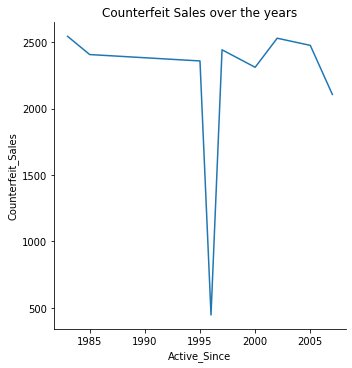

In [31]:
sns.relplot(x='Active_Since', y='Counterfeit_Sales', data=df_train, kind='line', ci=None)
plt.title('Counterfeit Sales over the years')

Reading:

1. The Sales from 1985 to 2005 are in the range of 2500
2. It had dropped to less than 500 in 1996 but rose back again 
3. And dropped again below 2500 after 2005

## Sales over the years in different cities

Text(0.5, 1.1, 'Sales in different tier types')

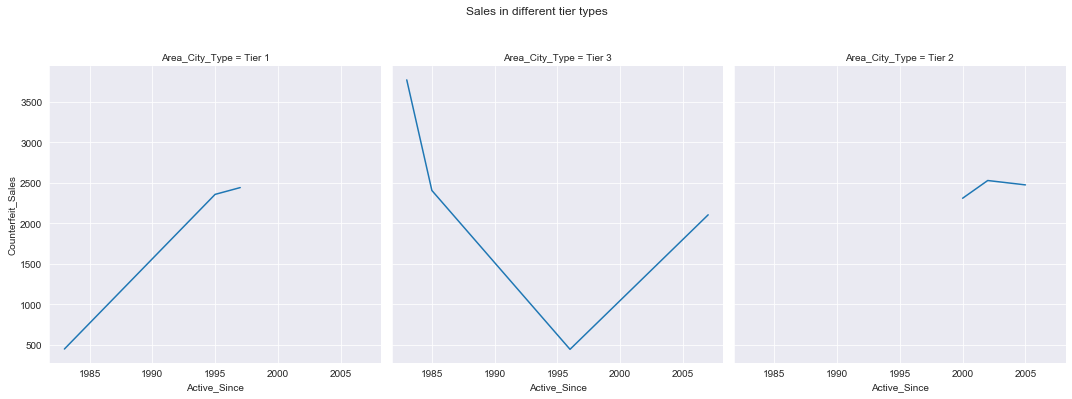

In [45]:
sns.set_style('darkgrid')
g=sns.relplot(x='Active_Since', y='Counterfeit_Sales', data=df_train, kind='line', ci=None, col='Area_City_Type')
g.fig.suptitle('Sales in different tier types', y=1.1)

Reading:

1. Sales in Tier1 cities were on a rise from 1985 to 1995, in these years, sales in Tier 3 cities were dropping and sales were zero in tier 2 cities.
2. After 1995, there were no sales in Tier1 cities and that in Tier3 cities were on a rise
3. Only after 2000, Tier2 cities had any sales. 

## Sales based on side effect level

Text(0.5, 1, 'Sales based on Side effects of drugs')

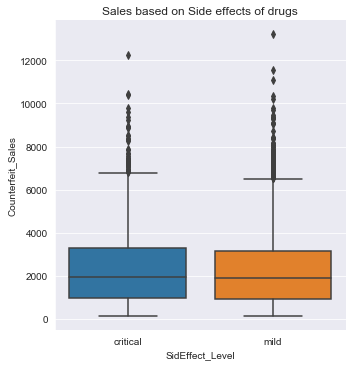

In [63]:
sns.catplot(x='SidEffect_Level', y='Counterfeit_Sales', kind='box', data=df_train)
plt.title('Sales based on Side effects of drugs')

Reading:

1. For both the categories, median is almost similar i.e. counterfiet drugs that have mild as well as critical side effects are sold in equal quantities.
2. The max sales for mild side effect causing drug is >14000 and for critical side effects, it is >12000

## Any correlation between price and Sales

In [78]:
df_train.corr()

,Counterfeit_Weight,Active_Since,Medicine_MRP,Availability_rating,Counterfeit_Sales
Counterfeit_Weight,1.000000,-0.016590,0.028523,-0.017632,0.005959
Active_Since,-0.016590,1.000000,0.002996,-0.075744,-0.039595
Medicine_MRP,0.028523,0.002996,1.000000,-0.003216,0.573684
Availability_rating,-0.017632,-0.075744,-0.003216,1.000000,-0.124058
Counterfeit_Sales,0.005959,-0.039595,0.573684,-0.124058,1.000000


Text(0.5, 1.0, 'Sales vs Price')

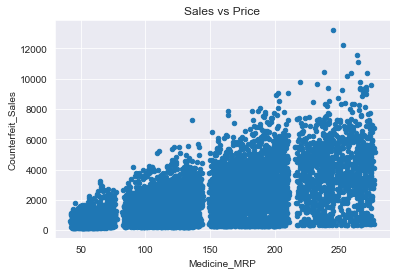

In [80]:
df_train.plot.scatter(x='Medicine_MRP', y='Counterfeit_Sales')
plt.title('Sales vs Price')

Reading: 

1. Sales and price of the medicine are positively correlated. 
2. For costly medicines, there is a much higher volumne of counterfeit sales.

## Which type of med has the max sales

Text(0.5, 1, 'Sales vs Medicine Type')

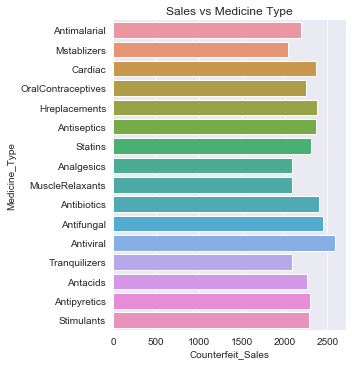

In [101]:
sns.catplot(y='Medicine_Type', x='Counterfeit_Sales', data=df_train, kind='bar', ci=None)
plt.title('Sales vs Medicine Type')

Reading: 

1. Antiviral meds have the max counterfiet sales crossing 2500
2. Rest all the meds have around 2000

# Modelling 

### Linear Regression

In [68]:
lm=LinearRegression()

X=df_train.drop(['Medicine_ID', 'Counterfeit_Sales'],1)
y=df_train['Counterfeit_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

lm.fit(X_train, y_train)

pred=lm.predict(X_test)

m=mae(y_test, pred)

print(1-m/1660)


0.4999697910594486


### Linear Regression with Ridge 

In [69]:
from sklearn.linear_model import Ridge

clf=Ridge(alpha=1.0)

clf.fit(X_train, y_train)

pred = clf.predict(X_test)

m=mae(y_test, pred)

print(1-m/1660)

0.500026327579251


## Linear Regression with Ridge and hyperparameter tuning 

In [70]:
from sklearn.linear_model import Ridge

alphas = np.linspace(1,100,100)

for i in alphas: 
    clf_ht=Ridge(alpha=i, fit_intercept=True)
    clf_ht.fit(X_train, y_train)
    pred_ht = clf_ht.predict(X_test)
    m=mae(y_test, pred_ht)
    #print(1-m/1660)

In [71]:
from sklearn.linear_model import Lasso

alphas = np.linspace(1,100,100)

for i in alphas: 
    clf_t=Ridge(alpha=i, fit_intercept=True)
    clf_t.fit(X_train, y_train)
    pred_t = clf_t.predict(X_test)
    m=mae(y_test, pred_t)
    #print(1-m/1660)

## Random Forest

In [72]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor()

rf.fit(X_train, y_train)

pred_rf=rf.predict(X_test)

m=mae(y_test, pred_rf)
print(1-m/1660)

0.5171283618079356


## Random forest + Hyperparameter tuning 

In [73]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = { 'n_estimators':[10,20,50,100],
               'max_depth' : [3,5,10,50,None],
               'min_samples_split':[2,5,10,15],
               'min_samples_leaf':[1,5,10,15],
                'max_leaf_nodes' :[5,7,10,16,20,30,45,50,70]                }

rf_ht=RandomForestRegressor()

grid=RandomizedSearchCV(estimator=rf_ht, param_distributions=param_dist, verbose=1,n_jobs=-1, n_iter=1000)

grid_result=grid.fit(X_train, y_train)

print(grid_result.best_score_)

print(grid_result.best_params_)




Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   53.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 15.5min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 19.8min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 25.1min
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed: 25.1min finished


0.6040485966755444
{'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 15, 'max_leaf_nodes': 45, 'max_depth': 5}


In [103]:
rf_best=RandomForestRegressor(n_estimators=50, min_samples_leaf=15, min_samples_split=5, max_leaf_nodes=45, max_depth=5)

rf_best.fit(X_train, y_train)

pred_rf_best = rf_best.predict(X_test)


In [104]:
m=mae(y_test, pred_rf_best)
print(1-m/1660)

0.5423990765204333


## Extra trees

In [85]:
from sklearn.ensemble import ExtraTreesRegressor

et=ExtraTreesRegressor()

et.fit(X_train, y_train)

pred_et=et.predict(X_test)

m=mae(y_test, pred_et)
print(1-m/1660)

0.4955503361516447


Read: https://www.thekerneltrip.com/statistics/random-forest-vs-extra-tree/#:~:text=The%20main%20difference%20between%20random,(for%20the%20extra%20trees).

Decision trees, being prone to overfit, have been transformed to random forests by training many trees over various subsamples of the data (in terms of both observations and predictors used to train them).

The main difference between random forests and extra trees (usually called extreme random forests) lies in the fact that, instead of computing the locally optimal feature/split combination (for the random forest), for each feature under consideration, a random value is selected for the split (for the extra trees).

In [86]:
param_dist = { 'n_estimators':[10,20,50,100],
               'max_depth' : [3,5,10,50,None],
               'min_samples_split':[2,5,10,15],
               'min_samples_leaf':[1,5,10,15],
                'max_leaf_nodes' :[5,7,10,16,20,30,45,50,70]                }

et_ht=ExtraTreesRegressor()

grid=RandomizedSearchCV(estimator=et_ht, param_distributions=param_dist, verbose=1,n_jobs=-1, n_iter=1000)

grid_result=grid.fit(X_train, y_train)

print(grid_result.best_score_)

print(grid_result.best_params_)


Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   45.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 17.4min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 21.3min
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed: 21.4min finished


0.6079854470918808
{'n_estimators': 50, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_leaf_nodes': 20, 'max_depth': 50}


In [87]:
et_best=ExtraTreesRegressor(n_estimators=50, min_samples_leaf=1, min_samples_split=15, max_leaf_nodes=20, max_depth=50)

et_best.fit(X_train, y_train)

pred_et_best = et_best.predict(X_test)


m=mae(y_test, pred_et_best)
print(1-m/1660)

0.5416066800720403


Read: 
1. https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-for-ensemble-models/  
2. https://www.analyticsvidhya.com/blog/2018/09/an-end-to-end-guide-to-understand-the-math-behind-xgboost/

## XGBoost

In [90]:
import xgboost as xgb

#pip install xgboost

model = xgb.XGBRegressor()

model.fit(X_train, y_train)

pred_XGB = model.predict(X_test)

In [96]:
m=mae(y_test, pred_XGB)
print(1-m/1660)

0.500893774847017


## Adaboost

In [97]:
from sklearn.ensemble import AdaBoostRegressor

ada=AdaBoostRegressor()

ada.fit(X_train, y_train)

ada_pred=ada.predict(X_test)

In [101]:
m=mae(y_test, ada_pred)
print(1-m/1660)

0.45248497487450734


In [107]:
ada=AdaBoostRegressor(base_estimator=rf_best, n_estimators=10)

ada.fit(X_train, y_train)

ada_pred=ada.predict(X_test)

In [108]:
m=mae(y_test, ada_pred)
print(1-m/1660)

0.5355061681897362
